In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import root_mean_squared_error as rmse
import pickle

In [56]:
!conda list

# packages in environment at /opt/anaconda3/envs/ride_duration_pred_model_MLOPS:
#
# Name                    Version                   Build  Channel
anyio                     4.9.0              pyh29332c3_0    conda-forge
appnope                   0.1.4              pyhd8ed1ab_1    conda-forge
argon2-cffi               23.1.0             pyhd8ed1ab_1    conda-forge
argon2-cffi-bindings      21.2.0           py39h06d86d0_5    conda-forge
arrow                     1.3.0              pyhd8ed1ab_1    conda-forge
asttokens                 3.0.0              pyhd8ed1ab_1    conda-forge
async-lru                 2.0.5              pyh29332c3_0    conda-forge
attrs                     25.3.0             pyh71513ae_0    conda-forge
aws-c-auth                0.9.0                h73ce21e_7    conda-forge
aws-c-cal                 0.9.0                h80a239a_1    conda-forge
aws-c-common              0.12.3               h6e16a3a_0    conda-forge
aws-c-compression         0.3.1                

In [2]:
# pd.read_parquet("/opt/anaconda3/envs/ride_duration_pred_model_MLOPS/ride_duration_prediction/dataset/green_tripdata_2021-01.parquet")
df = pd.read_parquet("./ride_duration_prediction/dataset/cleaned_dataset/yellow_tripdata_2023-01_cleaned.parquet")
df

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.30,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.90,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.90,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.10,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.40,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066761,2,2023-01-31 23:58:34,2023-02-01 00:12:33,NaN,3.05,NaN,None,107,48,0,15.80,0.00,0.5,3.96,0.0,1.0,23.76,NaN,NaN
3066762,2,2023-01-31 23:31:09,2023-01-31 23:50:36,NaN,5.80,NaN,None,112,75,0,22.43,0.00,0.5,2.64,0.0,1.0,29.07,NaN,NaN
3066763,2,2023-01-31 23:01:05,2023-01-31 23:25:36,NaN,4.67,NaN,None,114,239,0,17.61,0.00,0.5,5.32,0.0,1.0,26.93,NaN,NaN
3066764,2,2023-01-31 23:40:00,2023-01-31 23:53:00,NaN,3.15,NaN,None,230,79,0,18.15,0.00,0.5,4.43,0.0,1.0,26.58,NaN,NaN


In [3]:
df.dtypes

vendorid                          int64
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
ratecodeid                      float64
store_and_fwd_flag               object
pulocationid                      int64
dolocationid                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
dtype: object

In [4]:
# dispatch trip type which is represented by 2 || 1 is represented in Street-hail
# df_dispatch = df[df.trip_type == 2]
# df_dispatch

In [5]:
# to predict the duration of the trip, we need to subract the pickup from the dropoff time for dispatch trips
# df_dispatch_trip_duration = df_dispatch["lpep_dropoff_datetime"] - df_dispatch["lpep_pickup_datetime"]
# df_dispatch_trip_duration


In [6]:
# convert to dropoff and pickup to datetime
# dropoff_to_datetime = pd.to_datetime(df_dispatch["lpep_dropoff_datetime"])
# pickup_to_datetime = pd.to_datetime(df_dispatch["lpep_pickup_datetime"])
# dropoff_to_datetime

In [7]:
# pickup_to_datetime

In [8]:
# subtract the new datetime conversion
# converted_df_dispatch_trip_duration = dropoff_to_datetime - pickup_to_datetime
# converted_df_dispatch_trip_duration

Conversion is not necessary because it didn't throw an error

In [9]:
# create a column for the trip duration - our new dataset will now be called df_dispatch
# df_dispatch["dispatch_trip_duration"] = df_dispatch_trip_duration
# df_dispatch

In [10]:
# the current dispatch_trip_duration column is in a format that is not easy to provide to the model
# we need to convert the dispatch_trip_duration column to mins
# method 1
# df_dispatch["dispatch_trip_duration"] = df_dispatch["dispatch_trip_duration"] / 60
# df_dispatch

In [11]:
# method 2
# df_dispatch["dispatch_trip_duration"] = df_dispatch_trip_duration
# df_dispatch.dispatch_trip_duration = df_dispatch.dispatch_trip_duration.apply(lambda td: td.total_seconds() / 60)
# df_dispatch

In [12]:
# sns.displot(df_dispatch.dispatch_trip_duration)

We noticed that it has a long tail and it is hard to understand what is going on. Let's describe to see some new things

In [13]:
# df_dispatch.dispatch_trip_duration.describe()
# df_dispatch.dispatch_trip_duration.describe().to_frame().T

We see that (the below has been commented out in the code above)
- 25% of the trip were less than a minute, 
- 50% were over a minute while 
- 75% of them lasted a little over 14mins
- min trip was 0.00
- max trip lasted more than a day

We can go ahead to check other percentile

In [14]:
# df_dispatch.dispatch_trip_duration.describe(percentiles=[.95, .98, .99])
# df_dispatch.dispatch_trip_duration.describe(percentiles=[.95, .98, .99]).to_frame().T

We see that (already commented out in the code above)
- 95% of the trip lasted for a little over 35mins, 
- 98% lasted a little over 59mins
- 99% of them lasted for a little over 2hrs and 29.83mins

This provides something to predict with. We can filter for data that is >= 1min and <= 60mins since about 98% of the trips were a little over 59mins.

In [15]:
# ((df_dispatch.dispatch_trip_duration >= 1) & (df_dispatch.dispatch_trip_duration <= 60)).mean()

judging from the mean, 50% of the trip lasted more than a minute and less than 60mins. To have a more robust data, we will use both trip types, ride hailing and dispatch - commented out

In [16]:
df_trip_duration = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
df_trip_duration
# df_dispatch.dispatch_trip_duration.describe(percentiles=[.25, .5]).to_frame().T

0         0 days 00:08:26
1         0 days 00:06:19
2         0 days 00:12:45
3         0 days 00:09:37
4         0 days 00:10:50
                ...      
3066761   0 days 00:13:59
3066762   0 days 00:19:27
3066763   0 days 00:24:31
3066764   0 days 00:13:00
3066765   0 days 00:14:24
Length: 3066766, dtype: timedelta64[us]

In [17]:
# convert trip column to minutes and apply to all columns/trips
df["trip_duration"] = df_trip_duration
df.trip_duration = df.trip_duration.apply(lambda td: td.total_seconds() / 60)
df

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,trip_duration
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.30,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,8.433333
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.90,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,6.316667
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.90,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,12.750000
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.10,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,9.616667
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.40,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,10.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066761,2,2023-01-31 23:58:34,2023-02-01 00:12:33,NaN,3.05,NaN,None,107,48,0,15.80,0.00,0.5,3.96,0.0,1.0,23.76,NaN,NaN,13.983333
3066762,2,2023-01-31 23:31:09,2023-01-31 23:50:36,NaN,5.80,NaN,None,112,75,0,22.43,0.00,0.5,2.64,0.0,1.0,29.07,NaN,NaN,19.450000
3066763,2,2023-01-31 23:01:05,2023-01-31 23:25:36,NaN,4.67,NaN,None,114,239,0,17.61,0.00,0.5,5.32,0.0,1.0,26.93,NaN,NaN,24.516667
3066764,2,2023-01-31 23:40:00,2023-01-31 23:53:00,NaN,3.15,NaN,None,230,79,0,18.15,0.00,0.5,4.43,0.0,1.0,26.58,NaN,NaN,13.000000


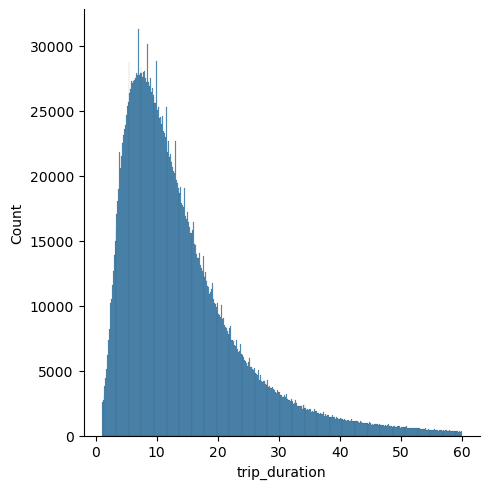

In [52]:
sns.displot(df.trip_duration)

In [19]:
df.trip_duration.describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
trip_duration,3066766.0,15.668995,42.594351,-29.2,7.116667,11.516667,18.3,10029.183333


In [20]:
df.trip_duration.describe(percentiles=[.95, .98, .99]).to_frame().T

,count,mean,std,min,50%,95%,98%,99%,max
trip_duration,3066766.0,15.668995,42.594351,-29.2,11.516667,36.466667,48.733333,57.25,10029.183333


In [21]:
((df.trip_duration >= 1) & (df.trip_duration <= 60)).mean()

np.float64(0.9812202822125979)

In [22]:
# take a subset of data to work with
df = df[(df.trip_duration >= 1) & (df.trip_duration <= 60)]
df

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,trip_duration
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.30,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,8.433333
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.90,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,6.316667
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.90,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,12.750000
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.10,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,9.616667
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.40,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,10.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066761,2,2023-01-31 23:58:34,2023-02-01 00:12:33,NaN,3.05,NaN,None,107,48,0,15.80,0.00,0.5,3.96,0.0,1.0,23.76,NaN,NaN,13.983333
3066762,2,2023-01-31 23:31:09,2023-01-31 23:50:36,NaN,5.80,NaN,None,112,75,0,22.43,0.00,0.5,2.64,0.0,1.0,29.07,NaN,NaN,19.450000
3066763,2,2023-01-31 23:01:05,2023-01-31 23:25:36,NaN,4.67,NaN,None,114,239,0,17.61,0.00,0.5,5.32,0.0,1.0,26.93,NaN,NaN,24.516667
3066764,2,2023-01-31 23:40:00,2023-01-31 23:53:00,NaN,3.15,NaN,None,230,79,0,18.15,0.00,0.5,4.43,0.0,1.0,26.58,NaN,NaN,13.000000


In [23]:
df.isnull().sum()

vendorid                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          71105
trip_distance                0
ratecodeid               71105
store_and_fwd_flag       71105
pulocationid                 0
dolocationid                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     71105
airport_fee              71105
trip_duration                0
dtype: int64

In [24]:
# selecting the categorical and numerical columns for training our model
categorical_cols = ["pulocationid", "dolocationid"]
numerical_cols = ["trip_distance"]

In [ ]:
# converting categorical columns to objects so that we can carry out one-hot encoding
# df[categorical_cols].astype(str)
# df[categorical_cols].astype(str).dtypes
df[categorical_cols] = df[categorical_cols].astype(str)

/var/folders/yl/5fnncqw17l7f7wmz9t_htbgr0000gn/T/ipykernel_76861/2271252288.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[categorical_cols] = df[categorical_cols].astype(str)


In [26]:
# using one-hot encoding to convert categorical columns to numerical. we need to use DictVectorizer to convert our categorical and numerical columns to dictionary format
dv = DictVectorizer()

In [27]:
train_dicts = df[categorical_cols + numerical_cols].to_dict(orient="records")
train_dicts

[{'pulocationid': '161', 'dolocationid': '141', 'trip_distance': 0.97},
 {'pulocationid': '43', 'dolocationid': '237', 'trip_distance': 1.1},
 {'pulocationid': '48', 'dolocationid': '238', 'trip_distance': 2.51},
 {'pulocationid': '138', 'dolocationid': '7', 'trip_distance': 1.9},
 {'pulocationid': '107', 'dolocationid': '79', 'trip_distance': 1.43},
 {'pulocationid': '161', 'dolocationid': '137', 'trip_distance': 1.84},
 {'pulocationid': '239', 'dolocationid': '143', 'trip_distance': 1.66},
 {'pulocationid': '142', 'dolocationid': '200', 'trip_distance': 11.7},
 {'pulocationid': '164', 'dolocationid': '236', 'trip_distance': 2.95},
 {'pulocationid': '141', 'dolocationid': '107', 'trip_distance': 3.01},
 {'pulocationid': '234', 'dolocationid': '68', 'trip_distance': 1.8},
 {'pulocationid': '79', 'dolocationid': '264', 'trip_distance': 7.3},
 {'pulocationid': '164', 'dolocationid': '143', 'trip_distance': 3.23},
 {'pulocationid': '138', 'dolocationid': '33', 'trip_distance': 11.43},
 {'

In [28]:
# to get our feature matrix, we need to fit the DictVectorizer on the train_dicts
X_train = dv.fit_transform(train_dicts)
X_train

<3009173x516 sparse matrix of type '<class 'numpy.float64'>'
	with 9027519 stored elements in Compressed Sparse Row format>

In [29]:
dv.feature_names_

['dolocationid=1',
 'dolocationid=10',
 'dolocationid=100',
 'dolocationid=101',
 'dolocationid=102',
 'dolocationid=106',
 'dolocationid=107',
 'dolocationid=108',
 'dolocationid=109',
 'dolocationid=11',
 'dolocationid=111',
 'dolocationid=112',
 'dolocationid=113',
 'dolocationid=114',
 'dolocationid=115',
 'dolocationid=116',
 'dolocationid=117',
 'dolocationid=118',
 'dolocationid=119',
 'dolocationid=12',
 'dolocationid=120',
 'dolocationid=121',
 'dolocationid=122',
 'dolocationid=123',
 'dolocationid=124',
 'dolocationid=125',
 'dolocationid=126',
 'dolocationid=127',
 'dolocationid=128',
 'dolocationid=129',
 'dolocationid=13',
 'dolocationid=130',
 'dolocationid=131',
 'dolocationid=132',
 'dolocationid=133',
 'dolocationid=134',
 'dolocationid=135',
 'dolocationid=136',
 'dolocationid=137',
 'dolocationid=138',
 'dolocationid=139',
 'dolocationid=14',
 'dolocationid=140',
 'dolocationid=141',
 'dolocationid=142',
 'dolocationid=143',
 'dolocationid=144',
 'dolocationid=145',

In [30]:
# we need the target variable for our model, which is the trip_duration
target = "trip_duration"
y_train = df[target].values
y_train

array([ 8.43333333,  6.31666667, 12.75      , ..., 24.51666667,
       13.        , 14.4       ])

In [31]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [32]:
y_pred = lr.predict(X_train)
y_pred

array([11.56949154, 10.93823653, 11.35065823, ..., 11.7787897 ,
       12.75287265, 11.495703  ])

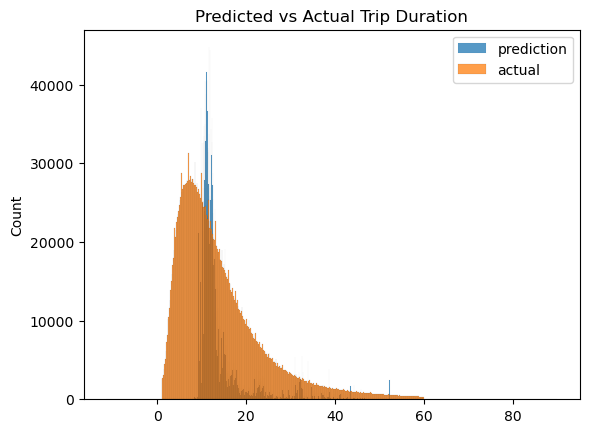

In [59]:
# visualizing the predictions vs actual values
sns.histplot(y_pred, label="prediction")
sns.histplot(y_train, label="actual")
plt.legend()
# plt.xlabel("Trip Duration (minutes)")
# plt.ylabel("Frequency")
plt.title("Predicted vs Actual Trip Duration")
plt.show()

In [34]:
# checking the performance of the model
rmse(y_train, y_pred)
# mean_squared_error(y_train, y_pred)

7.656752078217351

In [35]:
# create a fuction to load the dataset and train the model

def read_dataframe(filename):
    # read the parquet file
    df = pd.read_parquet(filename)
    
    # duration column creation and conversion to minutes
    df_trip_duration = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df["trip_duration"] = df_trip_duration
    df.trip_duration = df.trip_duration.apply(lambda td: td.total_seconds() / 60)

    # duration between 1 and 60 minutes
    df = df[(df.trip_duration >= 1) & (df.trip_duration <= 60)]

    # categorical and numerical columns selection
    categorical_cols = ["pulocationid", "dolocationid"]
    # numerical_cols = ["trip_distance"]

    # turning categorical columns to string
    df[categorical_cols] = df[categorical_cols].astype(str)

    return df

In [36]:
df_train = read_dataframe("./ride_duration_prediction/dataset/cleaned_dataset/yellow_tripdata_2023-01_cleaned.parquet")
df_validation = read_dataframe("ride_duration_prediction/dataset/cleaned_dataset/yellow_tripdata_2023-02_cleaned.parquet")

In [37]:
len(df_train), len(df_validation)

(3009173, 2855951)

In [ ]:
# model training code
categorical_cols = ["pulocationid", "dolocationid"]
numerical_cols = ["trip_distance"]

dv = DictVectorizer()

# train_dict
train_dicts = df_train[categorical_cols + numerical_cols].to_dict(orient="records")
X_train = dv.fit_transform(train_dicts)

val_dicts = df_validation[categorical_cols + numerical_cols].to_dict(orient="records")
X_val = dv.transform(val_dicts)


In [39]:
target = "trip_duration"
y_train = df_train[target].values
y_val = df_validation[target].values

In [60]:
# lr
lr = LinearRegression()
lr.fit(X_train, y_train)

# y_pred
y_pred_lr = lr.predict(X_val)
    
# mean_squared_error
rmse(y_val, y_pred)

7.8186217850321595

In [41]:

# y_pred_train = lr.predict(X_train)
# rmse(y_train, y_pred_train)

lasso = Lasso()
lasso.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_val)

rmse(y_val, y_pred)

7.8186217850321595

In [42]:
ridge = Ridge()
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_val)

rmse(y_val, y_pred_ridge)

7.812877555221832

In [43]:
# creating the pickup_dropoff_pair column for both train and validation datasets
df_train["pickup_dropoff_pair"] = df_train["pulocationid"] + "_" + df_train["dolocationid"]
df_validation["pickup_dropoff_pair"] = df_validation["pulocationid"] + "_" + df_validation["dolocationid"]

In [44]:
df_train

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,trip_duration,pickup_dropoff_pair
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,...,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,8.433333,161_141
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,...,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,6.316667,43_237
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,...,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,12.750000,48_238
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,...,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,9.616667,138_7
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,...,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,10.833333,107_79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066761,2,2023-01-31 23:58:34,2023-02-01 00:12:33,NaN,3.05,NaN,None,107,48,0,...,0.00,0.5,3.96,0.0,1.0,23.76,NaN,NaN,13.983333,107_48
3066762,2,2023-01-31 23:31:09,2023-01-31 23:50:36,NaN,5.80,NaN,None,112,75,0,...,0.00,0.5,2.64,0.0,1.0,29.07,NaN,NaN,19.450000,112_75
3066763,2,2023-01-31 23:01:05,2023-01-31 23:25:36,NaN,4.67,NaN,None,114,239,0,...,0.00,0.5,5.32,0.0,1.0,26.93,NaN,NaN,24.516667,114_239
3066764,2,2023-01-31 23:40:00,2023-01-31 23:53:00,NaN,3.15,NaN,None,230,79,0,...,0.00,0.5,4.43,0.0,1.0,26.58,NaN,NaN,13.000000,230_79


In [45]:
# using the pickup_dropoff_pair as a feature
categorical_cols_2 = ["pickup_dropoff_pair"]
numerical_cols = ["trip_distance"]

dv = DictVectorizer()

# train_dict
train_dicts_2 = df_train[categorical_cols_2 + numerical_cols].to_dict(orient="records")
X_train_2 = dv.fit_transform(train_dicts_2)

val_dicts_2 = df_validation[categorical_cols_2 + numerical_cols].to_dict(orient="records")
X_val_2 = dv.transform(val_dicts_2)

In [46]:
# lr
lr_2 = LinearRegression()
lr_2.fit(X_train_2, y_train)

# y_pred
y_pred_2 = lr_2.predict(X_val_2)
    
# mean_squared_error
rmse(y_val, y_pred_2)

5.256161852140748

In [47]:
lasso_2 = Lasso()
lasso_2.fit(X_train_2, y_train)

y_pred_lasso_2 = lasso_2.predict(X_val_2)

rmse(y_val, y_pred_2)

5.256161852140748

In [48]:
ridge_2 = Ridge()
ridge_2.fit(X_train_2, y_train)

y_pred_ridge_2 = ridge_2.predict(X_val_2)

rmse(y_val, y_pred_ridge_2)

5.2236150139896145

Using pickup_dropoff_pair as our categorical variable fared worse than using the pickup and drop off.

In [49]:
with open("ride_duration_prediction/models/linear_regression_model.bin", "wb") as f_out:
    pickle.dump((dv, lr), f_out)

In [50]:
with open("ride_duration_prediction/models/lasso_model.bin", "wb") as f_out:
    pickle.dump((dv, lasso), f_out)

In [51]:
with open("ride_duration_prediction/models/ridge_model.bin", "wb") as f_out:
    pickle.dump((dv, ridge), f_out)